导入需要的库，包括 Pandas 用于读取 CSV 文件，Matplotlib 和 Seaborn 用于绘制图形。

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

使用 Pandas 读取 CSV 文件，并将数据存储在 DataFrame 中。

In [18]:
# df = pd.read_csv('Data_V1.2.csv')

# # Insert a new column for the hard reported ratio
# df['hard_reported_ratio'] = df['Number in hard mode'] / df['Number of  reported results']

调用 DataFrame 的 corr 方法，计算数据之间的相关性系数矩阵。

In [19]:
# corr_matrix = df.corr()

使用 Seaborn 的 heatmap 函数绘制相关度图。你可以设置图形的颜色、标签和标题。

In [20]:
# plt.figure(figsize=(10, 8)) # 设置图形大小
# sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f') # 绘制相关度图，设置颜色和标签
# plt.title('Corr') # 添加标题
# plt.show() # 显示图形

只想显示最后一行的热力图，并去掉自身的相关系数，可以在绘制热力图时指定只显示最后一行，并将最后一行的值替换为 NaN。

In [21]:
# # 选取最后一行
# corr_matrix_last = corr_matrix.tail(1)
# # 去掉最后一格，仅保留之前
# corr_matrix_last = corr_matrix.iloc[:, :-1]

# plt.figure(figsize=(16, 1))
# sns.heatmap(corr_matrix_last.tail(1), cmap='coolwarm', annot=True,
#             fmt='.2f', cbar=False)
# plt.title('corr')
# plt.savefig('corr.png', dpi=1000, bbox_inches='tight')
# plt.show()

In [22]:
# ggplot
# import pyensae
# from pyensae.graphhelper import Corrplot
# plt.figure(figsize=(16, 1))
# c=Corrplot(corr_matrix_last)
# c.plot(mar=c(0, 0, 0, 0))

In [23]:
# # from sklearn.preprocessing import MinMaxScaler
# df = pd.read_csv('20220328-or.csv')

# # # # Find the same letter count in the word column
# # # df['Collision'] = df['Word'].apply(lambda x: len(x) - len(set(x)))
# # # # Save back to csv
# # # df.to_csv('Data_V1.4_corr.csv', index=False)

# # # removed_cols = ['Word', 'Date', 'Number of reported results', 'Number in hard mode', '1 try','2 tries','3 tries','4 tries','5 tries','6 tries','7 or more tries (X)', 'eu', 'oe', 'fj']
# # removed_cols = []
# # df = df.drop(removed_cols, axis=1)


# # Convert time string to timestamp
# time_cols1 = ['手术日期', '手术开始时间', '手术结束时间']  # 2019-11-25 17:54:00
# time_cols2 = ['入院时间',	'出院时间']  # 2019/11/21 9:14
# for col in time_cols1:
#     # To timestamp
#     df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S')
# for col in time_cols2:
#     df[col] = pd.to_datetime(df[col], format='%Y/%m/%d %H:%M')


# # Save to new csv
# df.to_csv('20220328-or-clean.csv', index=False)

# # Convert datetime to float
# for col in time_cols1:
#     df[col] = df[col].astype('int64') / 10**9
# for col in time_cols2:
#     df[col] = df[col].astype('int64') / 10**9

# # Set NaN to negative of max value of the column
# for col in df.columns:
#     df[col] = df[col].fillna(-df[col].max())

# # Normalize 0-1
# scaler = MinMaxScaler()
# df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# # Save to new csv
# df.to_csv('20220328-or-clean-norm.csv', index=False)

In [24]:
df = pd.read_csv('datasets/20220328-or-clean-norm.csv')

removed_cols = ['Postoperative Olanzapine', 'Postoperative Fluphenazine', 'Postoperative Flupentixol']
df = df.drop(removed_cols, axis=1)

In [25]:
# def get_corr_with_nn(df):
#     import tensorflow as tf
#     import numpy as np

#     # 使用TensorFlow Keras构建一个简单的神经网络
#     model = tf.keras.Sequential([
#         tf.keras.layers.Dense(64, activation='relu'),
#         tf.keras.layers.Dense(1)
#     ])
#     model.compile(optimizer='adam', loss='mse')

#     # 对每一列使用神经网络进行非线性相关度分析
#     nn_mat = np.zeros((len(df.columns), len(df.columns)))
#     for i in range(len(df.columns)):
#         for j in range(i, len(df.columns)):
#             x = df.iloc[:, i].values.reshape(-1, 1)
#             y = df.iloc[:, j].values.reshape(-1, 1)
#             model.fit(x, y, epochs=10, verbose=0)
#             corr = np.corrcoef(y.T, model.predict(x).T)[0, 1]
#             nn_mat[i, j] = corr
#             nn_mat[j, i] = corr
#     return nn_mat

In [26]:
# Get the correlation matrix
# corr_matrix = df.corr()
# # 或者可以使用 pandas 的 corrwith() 函数
from sklearn.feature_selection import mutual_info_regression
corr_matrix = df.apply(lambda x: df.apply(lambda y: mutual_info_regression(x.values.reshape(-1, 1), y.values)[0]))
# corr_matrix = get_corr_with_nn(df)

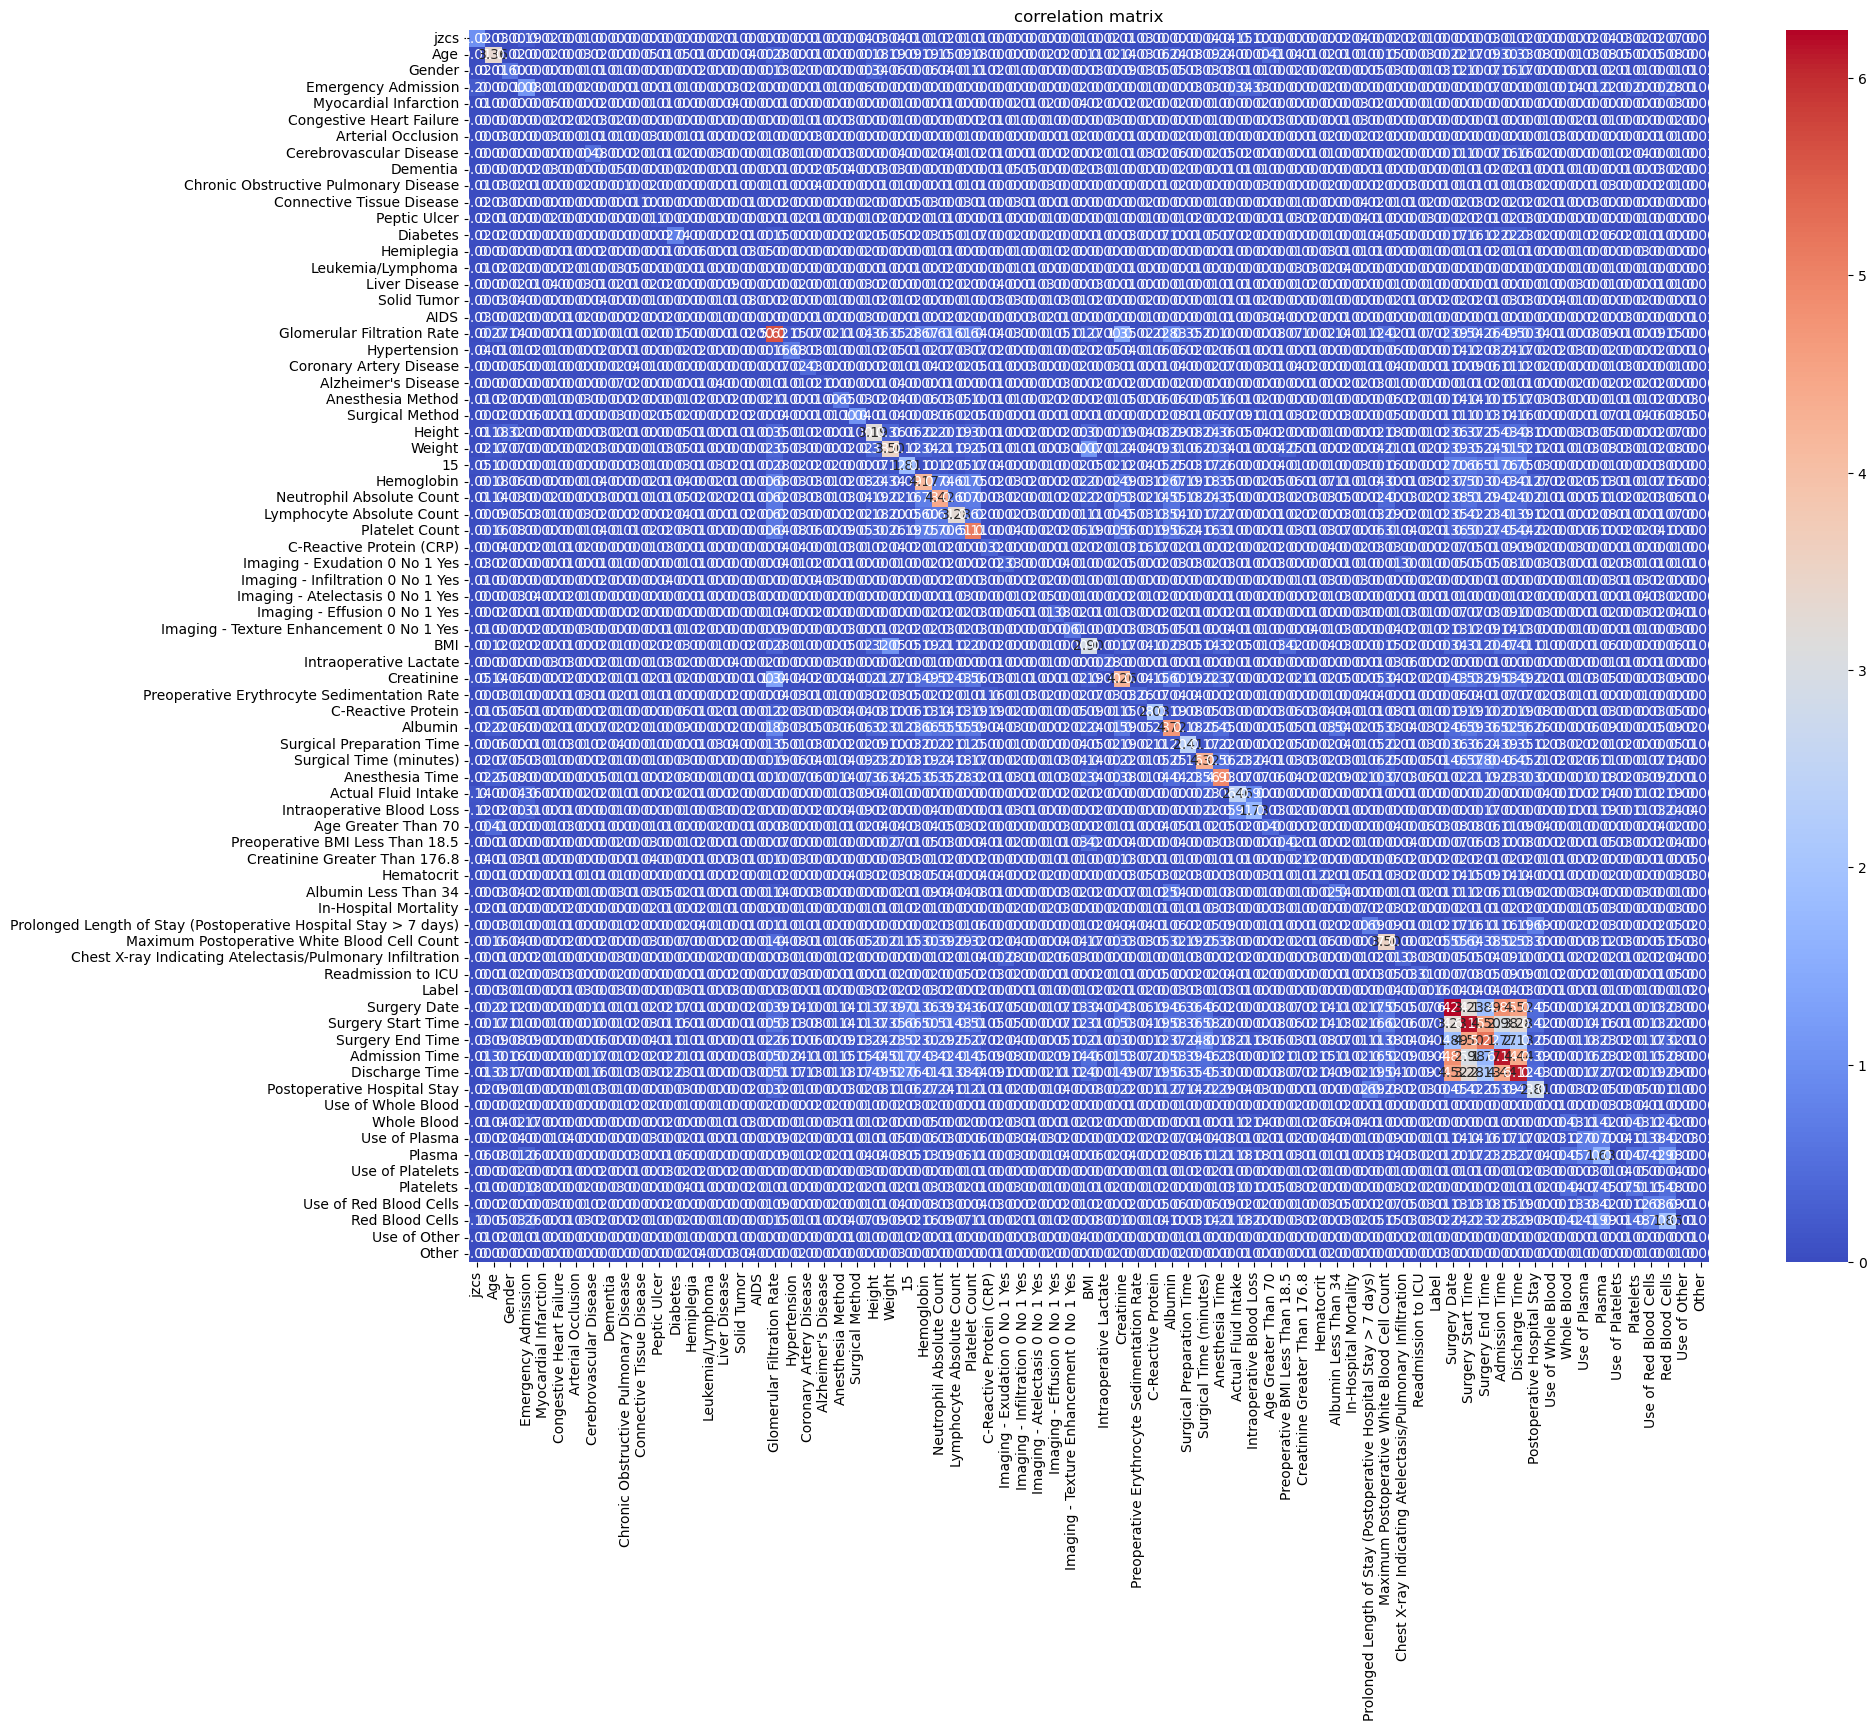

In [27]:
# Plot the correlation matrix
# Plot full matrix
plt.figure(figsize=(20, 16)) # 设置图形大小
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f') # 绘制相关度图，设置颜色和标签
plt.title('correlation matrix') # 添加标题
# plt.savefig('corrfull.png', dpi=1000, bbox_inches='tight')
plt.show() # 显示图形

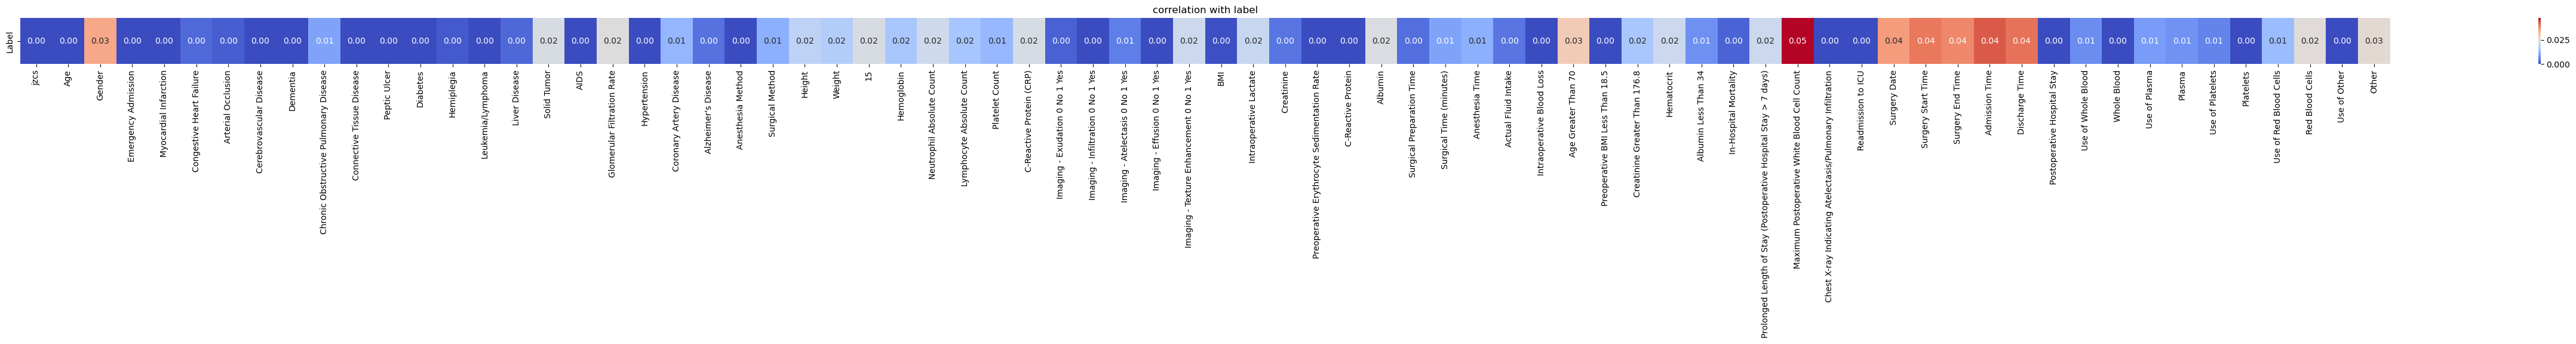

                                                       Label
jzcs                                                0.000000
Readmission to ICU                                  0.000000
Preoperative BMI Less Than 18.5                     0.000000
Postoperative Hospital Stay                         0.000000
Intraoperative Blood Loss                           0.000000
C-Reactive Protein                                  0.000000
Preoperative Erythrocyte Sedimentation Rate         0.000000
Use of Other                                        0.000000
Imaging - Effusion 0 No 1 Yes                       0.000000
Imaging - Infiltration 0 No 1 Yes                   0.000000
Whole Blood                                         0.000000
Anesthesia Method                                   0.000000
Hypertension                                        0.000000
AIDS                                                0.000000
Platelets                                           0.000000
Chest X-ray Indicating A

In [28]:
# Plot the correlation with "Average" column
corr_matrix_last = corr_matrix['Label']
corr_matrix_last = corr_matrix_last.drop('Label')

# reshape the data
corr_matrix_last = corr_matrix_last.to_frame()
corr_matrix_last = corr_matrix_last.transpose()

plt.figure(figsize=(64, 1))
sns.heatmap(corr_matrix_last.tail(1), cmap='coolwarm', annot=True,
            fmt='.2f')
plt.title('correlation with label')
# plt.savefig('corraratio.png', dpi=1000, bbox_inches='tight')
plt.show()

# Print least correlated columns
corr_matrix_last = corr_matrix_last.transpose()
corr_matrix_last = corr_matrix_last.sort_values(by='Label')
print(corr_matrix_last.head(30))

In [29]:
# df = pd.read_csv('20220328-or.csv')
# df = df.fillna(0)

# # Find the same letter count in the word column
# df['Collision'] = df['Word'].apply(lambda x: len(x) - len(set(x)))
# # Save back to csv
# df.to_csv('Data_V1.4_corr.csv', index=False)

# removed_cols = ['Postoperative Olanzapine',	'Postoperative Fluphenazine',	'Postoperative Flupentixol']
# input_cols = df.columns
# df = df[input_cols]
# df = df.drop(removed_cols, axis=1)

In [30]:
from sklearn.feature_selection import mutual_info_regression
corr_matrix = df.apply(lambda x: df.apply(lambda y: mutual_info_regression(x.values.reshape(-1, 1), y.values)[0]))

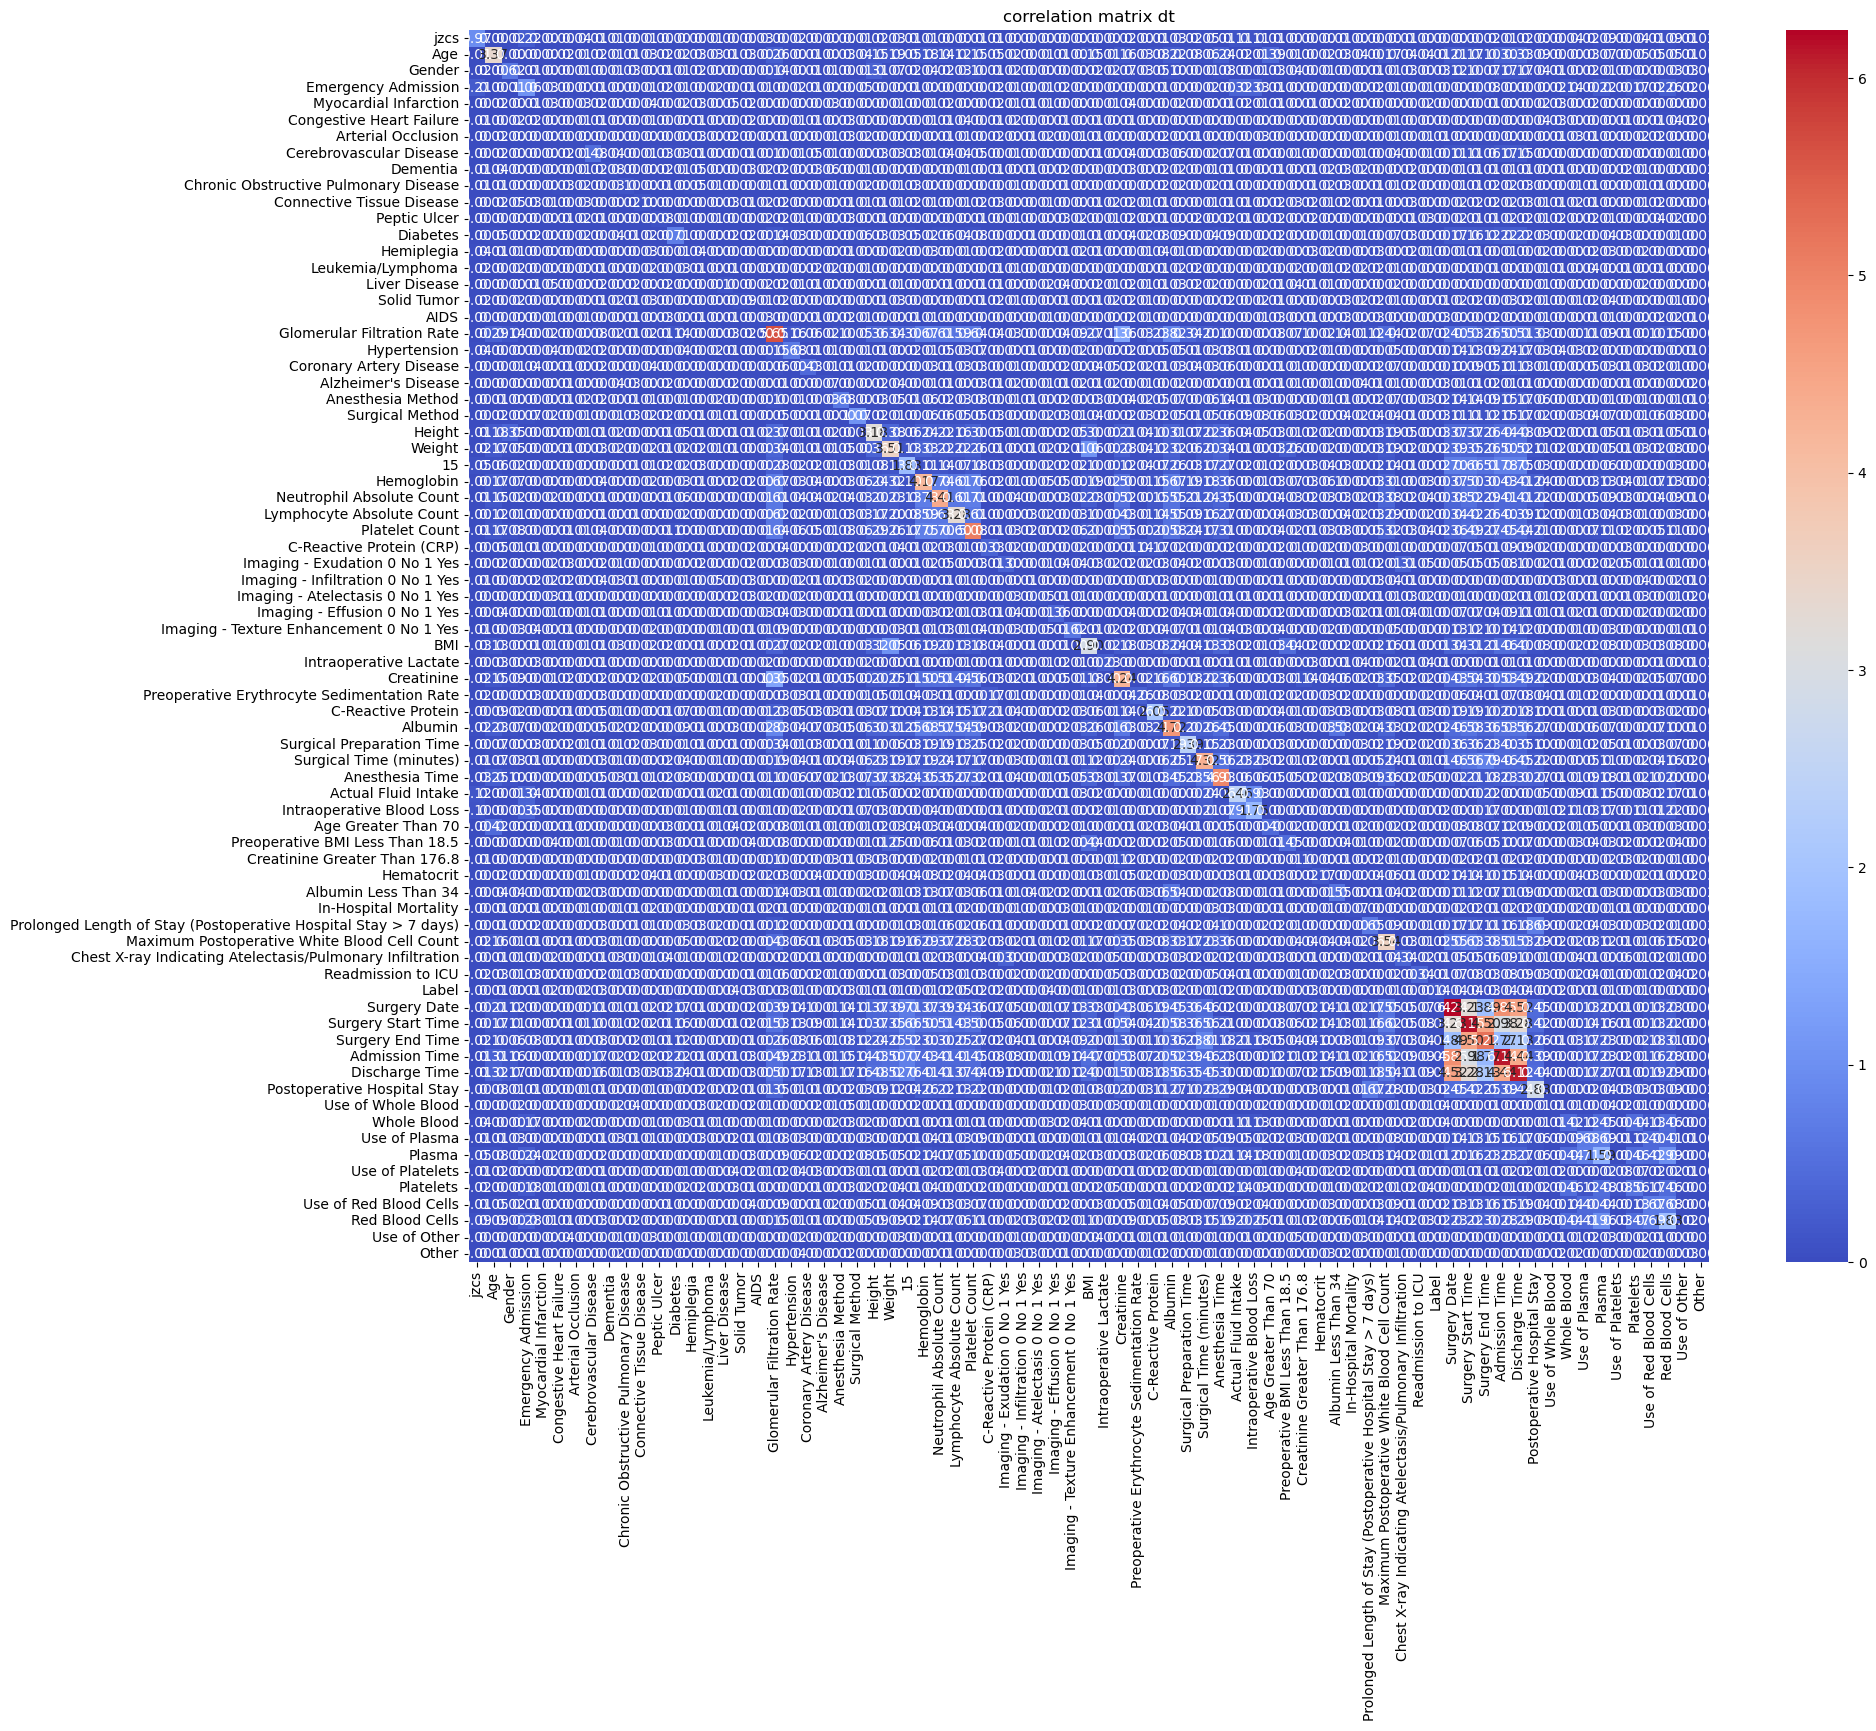

In [31]:
# Plot the correlation matrix
# Plot full matrix
plt.figure(figsize=(20, 16)) # 设置图形大小
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f') # 绘制相关度图，设置颜色和标签
plt.title('correlation matrix dt') # 添加标题
# plt.savefig('corrfull.png', dpi=1000, bbox_inches='tight')
plt.show() # 显示图形

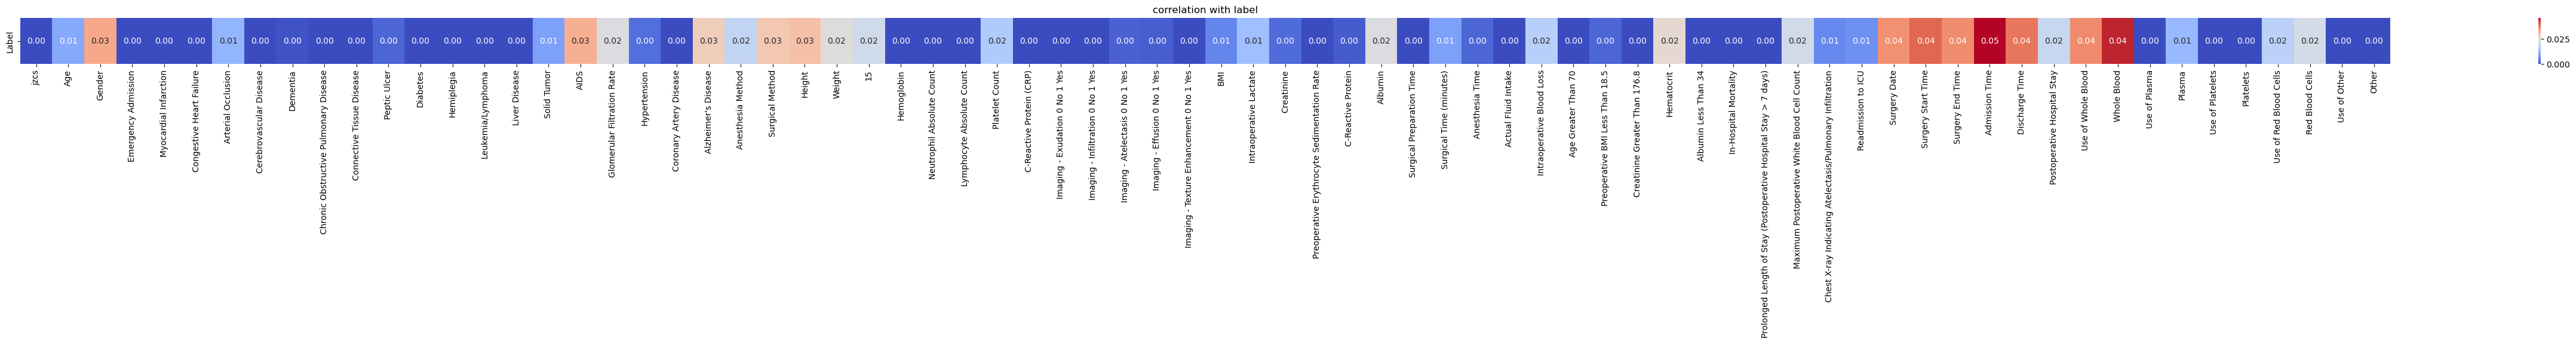

                       Label
Admission Time      0.045780
Whole Blood         0.044368
Surgery Start Time  0.039513
Discharge Time      0.037943
Use of Whole Blood  0.036056
Surgery End Time    0.035722
Surgery Date        0.035395
Gender              0.032656
AIDS                0.031707
Height              0.029220
                                                    Label
Other                                                 0.0
Prolonged Length of Stay (Postoperative Hospita...    0.0
Use of Platelets                                      0.0
In-Hospital Mortality                                 0.0
Use of Plasma                                         0.0
Albumin Less Than 34                                  0.0
Platelets                                             0.0
Use of Other                                          0.0
Creatinine Greater Than 176.8                         0.0
jzcs                                                  0.0
Age Greater Than 70                        

In [32]:
# Plot the correlation with "Average" column
corr_matrix_last = corr_matrix['Label']
corr_matrix_last = corr_matrix_last.drop('Label')

# reshape the data
corr_matrix_last = corr_matrix_last.to_frame()
corr_matrix_last = corr_matrix_last.transpose()

plt.figure(figsize=(64, 1))
sns.heatmap(corr_matrix_last.tail(1), cmap='coolwarm', annot=True,
            fmt='.2f')
plt.title('correlation with label')
plt.savefig('corraratiodt.png', dpi=1000, bbox_inches='tight')
plt.show()

# Print top 10 correlation
corr_matrix_last = corr_matrix_last.transpose()
corr_matrix_last = corr_matrix_last.sort_values(by='Label', ascending=False)
print(corr_matrix_last.head(10))

# Print least correlated columns
corr_matrix_last = corr_matrix_last.sort_values(by='Label')
print(corr_matrix_last.head(30))
